In [0]:
import time
start = time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install eli5
import eli5
# models
from sklearn import feature_selection
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.classify import Senna
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import preprocessing
from scipy.sparse import hstack, csr_matrix
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns


     |████████████████████████████████| 112kB 2.8MB/s 


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install chart_studio
import chart_studio.plotly as py

import gc

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


     |████████████████████████████████| 81kB 3.2MB/s 


In [0]:
train_data = pd.read_csv('./drive/My Drive/BT4240 data/result.csv')\
              .drop(columns=['Unnamed: 0', 'Unnamed: 0.1'],axis=1)
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,description,total_cost,Project Resource Category,Project Need Statement
0,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,{Reebok Girls' Fashion Dance Graphic T-Shirt -...,400.00,Supplies,My students need matching shirts to wear for d...
1,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,{Amazon - Fire Kids Edition - 7'- Tablet - 16G...,727.36,Technology,My students need tablets in order to communic...
2,p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Math & Science,Mathematics,Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,I have used alternative seating in my classroo...,NaN,NaN,My students need seating that allows the most ...,13,1,"{Kore Patented WOBBLE Chair, Made in the USA, ...",319.80,Supplies,My students need seating that allows the most ...
3,p030093,b9e731e16ad8669f37a43e5316518106,Teacher,VA,2017-03-09 17:16:13,Grades PreK-2,"Literacy & Language, Math & Science","Literature & Writing, Mathematics","Writing, Writing, Writing!",My classroom has 24 students in it. We have an...,"In our classroom, we use dry erase boards thro...",NaN,NaN,My students need individual dry erase boards t...,1,1,{BOARD LEARNING THE CLASSICS W/MARKER},102.00,Supplies,My students need individual dry erase boards t...
4,p225747,4681d60136ea859084ab488f2254b219,Ms.,PA,2016-12-08 13:25:03,Grades 3-5,"Applied Learning, Literacy & Language","Character Education, Literacy",Life Lessons through Literacy,"My school is located in a high poverty area, j...",As a Reading Specialist who serves Grades 1-8 ...,NaN,NaN,My students need books that teach life lessons...,3,1,"{A Bad Case of Stripes (Scholastic Bookshelf),...",176.59,Books,My students need books that teach life lessons...


In [0]:
train_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'description', 'total_cost', 'Project Resource Category',
       'Project Need Statement'],
      dtype='object')

In [0]:
#drop numeric columns 
df=train_data.drop(columns=['teacher_id','teacher_prefix','school_state', 'project_subject_categories', 'project_subject_subcategories','teacher_number_of_previously_posted_projects', 'total_cost' ,'Project Need Statement'])
df.columns

Index(['id', 'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'project_is_approved', 'description', 'Project Resource Category'],
      dtype='object')

In [0]:
#join essays together 
df.replace(np.nan, '', regex=True)
df.fillna('',inplace=True)
df['text'] = df.apply(lambda row: ' '.join([
    str(row['project_essay_1']), 
    str(row['project_essay_2']), 
    str(row['project_essay_3']), 
    str(row['project_essay_4'])]), axis=1)

In [0]:
df['text'].head()

0    Our elementary school is a culturally rich sch...
1    My kids tell me each day that they want to mak...
2    My seventh graders dream big. They can't wait ...
3    My classroom has 24 students in it. We have an...
4    My school is located in a high poverty area, j...
Name: text, dtype: object

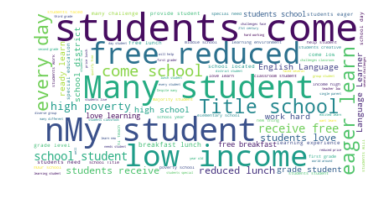

In [0]:
def genWordCloud(col_name):
    df[col_name]=df[col_name].fillna('')
    text_essay=" ".join(str(essay) for essay in df[col_name])
    #using the stopwords available in python 
    stopwords = set(STOPWORDS)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_essay)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    fig=plt.show()
    return fig

wordcloud1=genWordCloud('project_essay_1')
wordcloud1

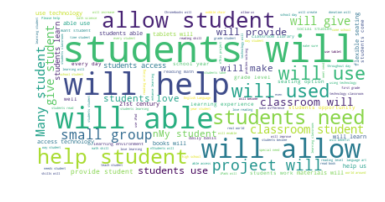

In [0]:
wordcloud2=genWordCloud('project_essay_2')
wordcloud2

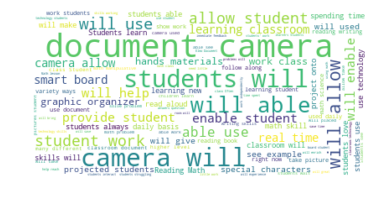

In [0]:
wordcloud3=genWordCloud('project_essay_3')
wordcloud3

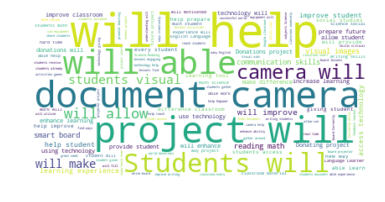

In [0]:
wordcloud4=genWordCloud('project_essay_4')
wordcloud4

In [0]:
wordcloud_all=genWordCloud('text')
wordcloud_all